In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
# from autils import *

In [5]:
def load_data():
    X = np.load('data/X.npy')
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

def load_weights():
    w1 = np.load("data/w1.npy")
    b1 = np.load("data/b1.npy")
    w2 = np.load("data/w2.npy")
    b2 = np.load("data/b2.npy")
    return w1, b1, w2, b2

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [6]:
# def load_data2(filename):
#     data = np.loadtxt(filename, delimiter=',')
#     X = data[:,:2]
#     y = data[:,2]
#     return X, y

In [7]:
# os.getcwd()
X, y = load_data()

In [8]:
print('first element X: ', X[0])

first element X:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.000

In [10]:
print('first y: ', y[0,0])
print('last y : ', y[-1,0])

first y:  0
last y :  1


In [14]:
print("X shape & y shape: " + str(X.shape) + str(y.shape))

X shape & y shape: (1000, 400)(1000, 1)


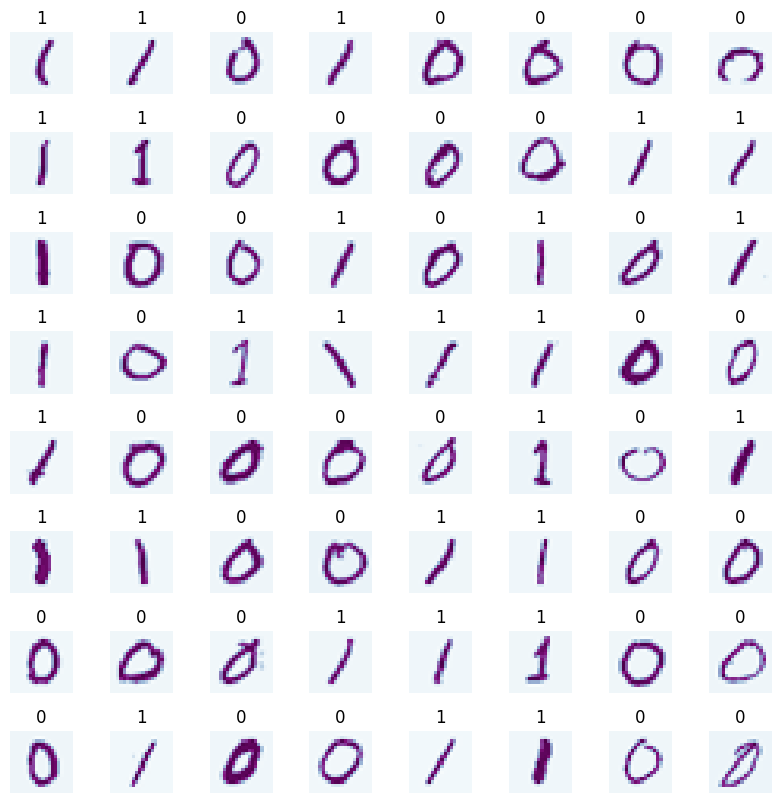

In [22]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap= 'BuPu')

    ax.set_title(y[random_index,0])
    ax.set_axis_off()




In [23]:

model = Sequential(
    [
    tf.keras.Input(shape=(400,)),
    Dense(25, activation = 'sigmoid'),
    Dense(15, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
    ], name = "my_model"


)

In [26]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [24]:
from public_tests import *

test_c1(model)

All tests passed!


In [25]:
print(model)

In [27]:
L1_num_params = 400 * 25 + 25
L2_num_params = 25 * 15 + 15
L3_num_params = 15 * 1 + 1
print("L1 params = ", L1_num_params, " L2 params = ", L2_num_params, " L3 params = ", L3_num_params)

L1 params =  10025  L2 params =  390  L3 params =  16


In [29]:
[layer1, layer2, layer3] = model.layers

In [33]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")

W1 shape = (400, 25), b1 shape = (25,)


In [39]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.03611141],
       [ 0.39406258],
       [ 0.09879202],
       [ 0.44732994],
       [-0.53438836],
       [ 0.3914222 ],
       [-0.3031995 ],
       [ 0.43532282],
       [ 0.52073425],
       [-0.03086638],
       [-0.04659462],
       [-0.35103336],
       [ 0.5031306 ],
       [ 0.4262728 ],
       [-0.26097587]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [40]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X,y,
    epochs = 20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6960
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5568
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4152
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2072
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1233
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1009
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0632
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 13/20
32/32 [==============================

In [41]:
prediction = model.predict(X[0].reshape(1,400))
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f" predicting a one: {prediction}")


1/1 [==============================] - 0s 140ms/step
 predicting a zero: [[0.02939688]]
1/1 [==============================] - 0s 44ms/step
 predicting a one: [[0.9859803]]


In [42]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f" preiction after threshold: {yhat}")

 preiction after threshold: 1


In [43]:
print(   X_random_reshaped)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.95544413e-04 -2.67620562e-03
  -2.52696003e-02 -3.58301741e-02 -4.72194366e-02 -2.11887000e-02
   1.34645958e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00